Train shape: X: (20000, 784), Y: (20000, 1)
Validation shape: X: (10000, 784), Y: (10000, 1)
Standard deviation: 49.37799682313607
Mean value: 33.55274553571429
Standard deviation: 49.06676795408154
Mean value: 33.791224489795916
Initializing weight to shape: (785, 64)
Initializing weight to shape: (64, 10)
Early stop at  20 epochs
Final Train Cross Entropy Loss: 0.0014257033295223532
Final Validation Cross Entropy Loss: 0.17381323697542725
Train accuracy: 1.0
Validation accuracy: 0.9604


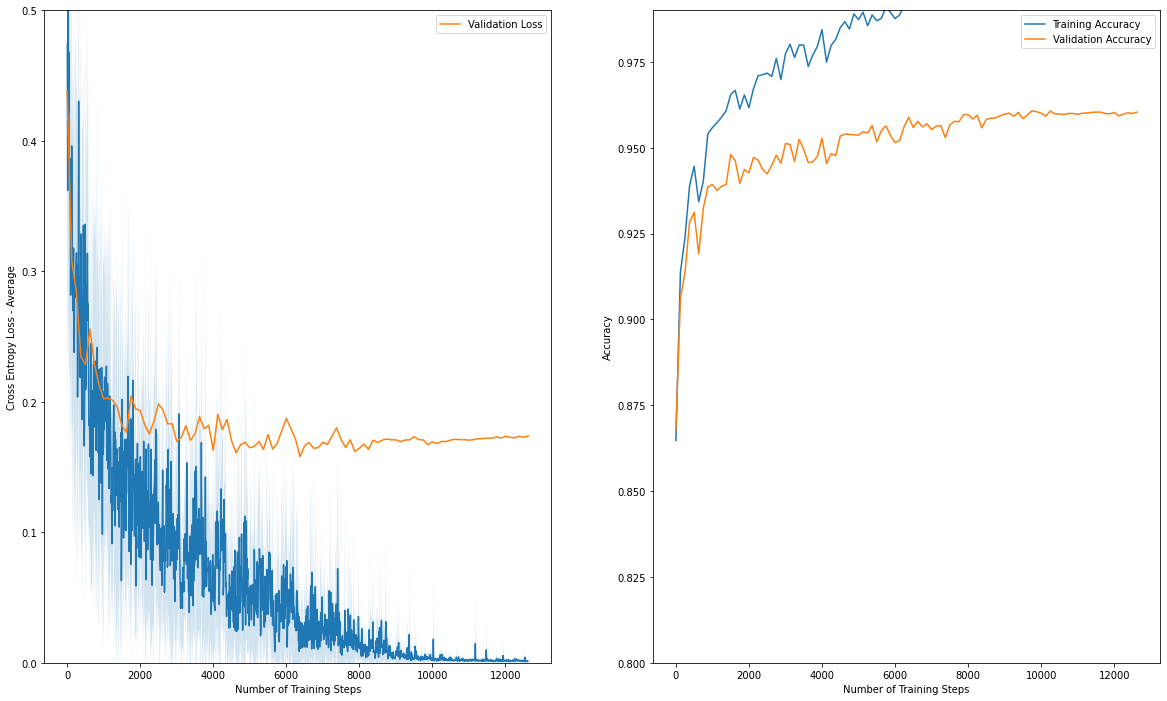

In [ ]:
%run task2a.ipynb
%run task2.ipynb
import utils
import matplotlib.pyplot as plt
#from task2a import pre_process_images, one_hot_encode, SoftmaxModel
#from task2 import SoftmaxTrainer

Train shape: X: (20000, 784), Y: (20000, 1)
Validation shape: X: (10000, 784), Y: (10000, 1)
Standard deviation: 49.37799682313607
Mean value: 33.55274553571429
Standard deviation: 49.06676795408154
Mean value: 33.791224489795916
Initializing weight to shape: (785, 64)
Initializing weight to shape: (64, 10)
Initializing weight to shape: (785, 64)
Initializing weight to shape: (64, 10)
Early stop at  28 epochs
Initializing weight to shape: (785, 64)
Initializing weight to shape: (64, 10)
Early stop at  18 epochs
Initializing weight to shape: (785, 64)
Initializing weight to shape: (64, 10)
Early stop at  20 epochs


'\n    #validation history\n    plt.subplot(1, 4, 2)\n    plt.ylim([0.85, .95])\n    utils.plot_loss(val_history["accuracy"], "Task 2 Model")\n    utils.plot_loss(\n        val_history_improved_weights["accuracy"], "Task 2 Model - Improved weights")\n    utils.plot_loss(\n        val_history_improved_weights["accuracy"], "Task 2 Model - Improved weights and Sigmoid")\n    utils.plot_loss(\n        val_history_improved_weights["accuracy"], "Task 2 Model - Improved weights, Sigmoid and momentum")\n    plt.ylabel("Validation Accuracy")\n    plt.legend()\n    plt.show()\n'

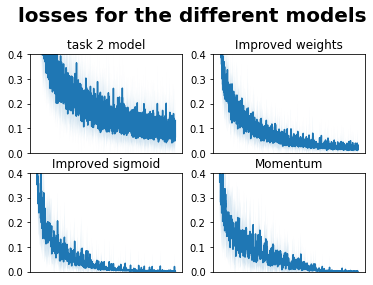

In [ ]:
if __name__ == "__main__":
    # hyperparameters DO NOT CHANGE IF NOT SPECIFIED IN ASSIGNMENT TEXT
    num_epochs = 50
    learning_rate = .1
    batch_size = 32
    neurons_per_layer = [64, 10]
    momentum_gamma = .9  # Task 3 hyperparameter
    shuffle_data = True
    use_improved_sigmoid = False
    use_improved_weight_init = False
    use_momentum = False

    # Load dataset
    X_train, Y_train, X_val, Y_val = utils.load_full_mnist()
    X_train = pre_process_images(X_train)
    X_val = pre_process_images(X_val)
    Y_train = one_hot_encode(Y_train, 10)
    Y_val = one_hot_encode(Y_val, 10)

    model = SoftmaxModel(
        neurons_per_layer,
        use_improved_sigmoid,
        use_improved_weight_init)
    trainer = SoftmaxTrainer(
        momentum_gamma, use_momentum,
        model, learning_rate, batch_size, shuffle_data,
        X_train, Y_train, X_val, Y_val,
    )
    train_history, val_history = trainer.train(num_epochs)

    #Comparison with improved weights
    use_improved_weight_init = True
    model_improved_weights = SoftmaxModel(
        neurons_per_layer,
        use_improved_sigmoid,
        use_improved_weight_init)
    trainer_improved_weights = SoftmaxTrainer(
        momentum_gamma, use_momentum,
        model_improved_weights, learning_rate, batch_size, shuffle_data,
        X_train, Y_train, X_val, Y_val,
    )
    train_history_improved_weights, val_history_improved_weights = trainer_improved_weights.train(
        num_epochs)

    #comparison with improved sigmoid
    use_improved_sigmoid = True
    use_improved_weight_init = True
    model_improved_weight_sigmoid = SoftmaxModel(
        neurons_per_layer,
        use_improved_sigmoid,
        use_improved_weight_init)
    trainer_improved_weights_sigmoid = SoftmaxTrainer(
        momentum_gamma, use_momentum,
        model_improved_weight_sigmoid, learning_rate, batch_size, shuffle_data,
        X_train, Y_train, X_val, Y_val,
    )
    train_history_improved_weights_sigmoid, val_history_improved_weights_sigmoid = trainer_improved_weights_sigmoid.train(
        num_epochs)
    
    #comparison with momentum algorithm
    use_momentum = True
    use_improved_sigmoid = True
    use_improved_weight_init = True
    learning_rate = .02
    model_improved_weight_sigmoid_momentum = SoftmaxModel(
        neurons_per_layer,
        use_improved_sigmoid,
        use_improved_weight_init)
    trainer_improved_weights_sigmoid_momentum = SoftmaxTrainer(
        momentum_gamma, use_momentum,
        model_improved_weight_sigmoid_momentum, learning_rate, batch_size, shuffle_data,
        X_train, Y_train, X_val, Y_val,
    )
    train_history_improved_weights_sigmoid_momentum, val_history_improved_weights_sigmoid_momentum = trainer_improved_weights_sigmoid_momentum.train(
        num_epochs)
    
    

    plt.subplot(2, 2, 1)
    utils.plot_loss(train_history["loss"],
                    "Task 2 Model", npoints_to_average=10)
    plt.ylim([0, .4])
    plt.xticks([])
    plt.title('task 2 model')

    plt.subplot(2, 2, 2)
    plt.title('Improved weights')
    plt.ylim([0, .4])
    plt.xticks([])
    utils.plot_loss(
        train_history_improved_weights["loss"], "Task 2 Model - improved weights", npoints_to_average=10)

    plt.subplot(2, 2, 3)
    plt.ylim([0, .4])
    plt.xticks([])
    plt.title('Improved sigmoid')
    utils.plot_loss(
        train_history_improved_weights_sigmoid["loss"], "Task 2 Model - improved weights and sigmoid", npoints_to_average=10)

    plt.subplot(2, 2, 4)
    plt.ylim([0, .4])
    plt.xticks([])
    utils.plot_loss(
        train_history_improved_weights_sigmoid_momentum["loss"], "Task 2 Model - improved weights, sigmoid and momentum", npoints_to_average=10)

    plt.title('Momentum')
    plt.suptitle('losses for the different models', fontsize='20', fontweight='bold', verticalalignment='bottom')
    
    


'''
    #validation history
    plt.subplot(1, 4, 2)
    plt.ylim([0.85, .95])
    utils.plot_loss(val_history["accuracy"], "Task 2 Model")
    utils.plot_loss(
        val_history_improved_weights["accuracy"], "Task 2 Model - Improved weights")
    utils.plot_loss(
        val_history_improved_weights["accuracy"], "Task 2 Model - Improved weights and Sigmoid")
    utils.plot_loss(
        val_history_improved_weights["accuracy"], "Task 2 Model - Improved weights, Sigmoid and momentum")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.show()
'''



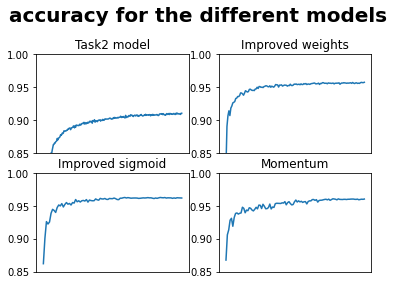

<Figure size 432x288 with 0 Axes>

In [ ]:


#validation history
plt.subplot(2, 2, 1)
plt.ylim([0.85, 1])
plt.xticks([])
plt.title('Task2 model')
utils.plot_loss(val_history["accuracy"], "Task 2 Model")



plt.subplot(2, 2, 2)
plt.ylim([0.85, 1])
plt.xticks([])
plt.title('Improved weights')
utils.plot_loss(
    val_history_improved_weights["accuracy"], "Task 2 Model - Improved weights")

plt.subplot(2, 2, 3)
plt.ylim([0.85, 1])
plt.xticks([])
plt.title('Improved sigmoid')
utils.plot_loss(
    val_history_improved_weights_sigmoid["accuracy"], "Task 2 Model - Improved weights and Sigmoid")

plt.subplot(2, 2, 4)
plt.ylim([0.85, 1])
plt.xticks([])
plt.title('Momentum')
utils.plot_loss(
    val_history_improved_weights_sigmoid_momentum["accuracy"], "Task 2 Model - Improved weights, Sigmoid and momentum")

plt.suptitle('accuracy for the different models', fontsize='20', fontweight='bold', verticalalignment='bottom' )
plt.show()
plt.savefig('task3_accuracy')


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fc7fa119-6ed4-4d50-aa34-54bc46270896' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>